In [482]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [483]:
titanic_train = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data = titanic_train.copy()
test_data = titanic_test.copy()

# **Data exploration**

In [484]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [485]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [486]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [487]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **38% of passengers survived the disaster**

In [488]:
train_data["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

## **Over 70% women passengers had survived, being only 35% of total passengers count**

**From historical records we know, that women and children had the priority.**

In [489]:
train_data["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

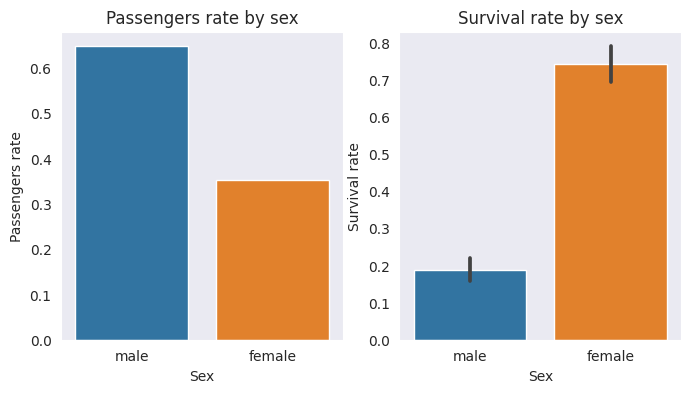

In [490]:
fig, axarr = plt.subplots(1, 2, figsize=(8,4))
#sns.countplot(x='Sex', data=train_data, ax=axarr[0])
sns.barplot(x=train_data.Sex.value_counts(normalize=True).index, y=train_data.Sex.value_counts(normalize=True), ax=axarr[0]).set_ylabel('Passengers rate')
axarr[0].set_title('Passengers rate by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

# **Columns Fare and Pclass have significant correlation with survival column** 

**Other numerical columns - Age, Parch and SibSp show some influence on survival column.**

In [491]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [492]:
numerical_df = train_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## **Chance of survival is above 60%, if people paid more than $70 for a ticket**

Text(0.5, 1.0, 'Survival rate by ticket price')

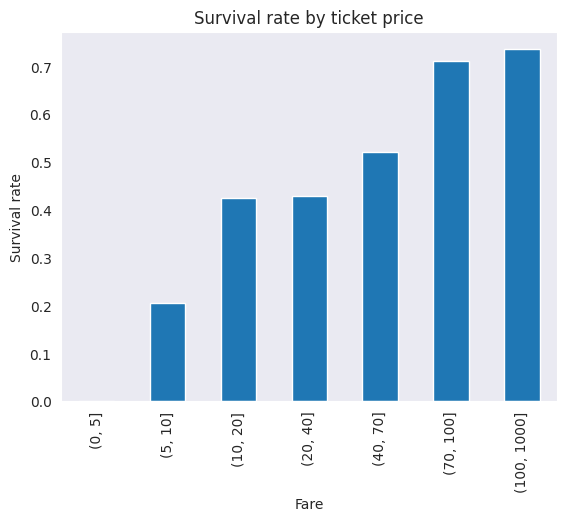

In [493]:
g = train_data['Survived'].groupby(pd.cut(train_data['Fare'], [0,5,10,20,40,70,100,1000])).mean().plot(kind='bar')
g.set_ylabel("Survival rate")
g.set_title("Survival rate by ticket price")

## **Being 3rd class male passenger meant less than 15% chance of survival**
**1st class male passegers survived with 36% chance, which is over overall survival rate for male passengers(<20%).**

**1st and 2nd class female passengers survived with a chance over 92%**

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


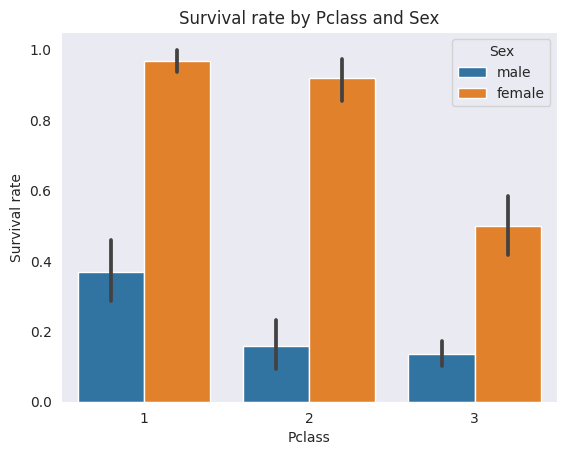

In [494]:
print(train_data.groupby(['Pclass', 'Sex'])['Survived'].mean())
plt.title('Survival rate by Pclass and Sex')
g = sns.barplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex).set_ylabel('Survival rate')


# **What is the best way to fill missing values at Age column?**
**Age has about 20% missing values in the dataset. The approach how to fill the missing data can significantly influence the resulting data.**

I will try three different approaches to fill missing data in the Age column. 
Fill the missing values with:
- mean from all rows of 'Age' column
- Each missing value will be filled with correspodding mean grouped by 'Pclass', 'SibSp', 'Parch' and 'Title' columns
- K-nearest neighbours (KNN)

Next code cell prepares the data for all three approaches.

In [495]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Title column 
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

# --------------------------------------------------------------------------------------
# Fill missing values in the "Age" column with mean of the whole column
X_transf_general = train_data.copy()
X_transf_general["Age"] = X_transf_general["Age"].fillna(X_transf_general["Age"].mean())
# --------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------
# Fill missing values in the "Age" column with mean for category 'Pclass', 'SibSp', 'Parch' and 'Title'
X_transformed = train_data.copy()
#age_means = X_transformed.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform('mean')
age_means = X_transformed.groupby(['Pclass', 'SibSp', 'Parch', 'Title'])['Age'].transform('mean')

X_transformed['Age'] = X_transformed['Age'].fillna(age_means)
# --------------------------------------------------------------------------------------


# --------------------------------------------------------------------------------------
# Fill missing values in the "Age" column with Predictive Imputation using KNN
#X_transformed_knn = train_data.copy()

# Drop the columns which will not be used for prediction
#X_transformed_knn = X_transformed_knn.drop(['Ticket', 'Name', 'Cabin', 'Embarked', 'Sex'], axis=1)

# OneHot encode non-numerical columns 'Sex' and 'Title'
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#encoded_cols = encoder.fit_transform(X_transformed_knn[['Sex', 'Title']])
#encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex', 'Title']))

# Combine with original data
#X_encoded = pd.concat([X_transformed_knn.drop(['Sex', 'Title'], axis=1), encoded_df], axis=1)

# Predict the Age with K-Nearest Neighbours method
#imputer = KNNImputer(n_neighbors=3, weights='distance')
#X_imputed = imputer.fit_transform(X_encoded)
#X_imputed = pd.DataFrame(X_imputed, columns=X_encoded.columns)
#X_imputed
# --------------------------------------------------------------------------------------
X_transformed_knn = train_data.copy()

# Encoding the 'Title' column
label_encoder = LabelEncoder()
X_transformed_knn['Title_encoded'] = label_encoder.fit_transform(X_transformed_knn['Title'])

# Selecting the columns for KNN imputation
impute_columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Title_encoded']
impute_data = X_transformed_knn[impute_columns]

# Setting up the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputing the missing values in the dataset
imputed_data = knn_imputer.fit_transform(impute_data)

# The imputed age values
imputed_ages = imputed_data[:, impute_columns.index('Age')]

# Adding the imputed ages back to the original dataframe
X_transformed_knn['Age_Imputed'] = imputed_ages

# Displaying the original Age and the Imputed Age for comparison
X_transformed_knn[['Age', 'Age_Imputed']].head(10)

#X_transformed_knn['Age'] = X_transformed_knn['Age_Imputed']
#X_transformed_knn = X_transformed_knn.drop('Age_Imputed', axis=1)



,Age,Age_Imputed
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,24.2
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


## **Graphical representation**

For visual comparisson of the three aproaches described above I use a kernel density estimate (KDE) plots, to compare distribution and variability.

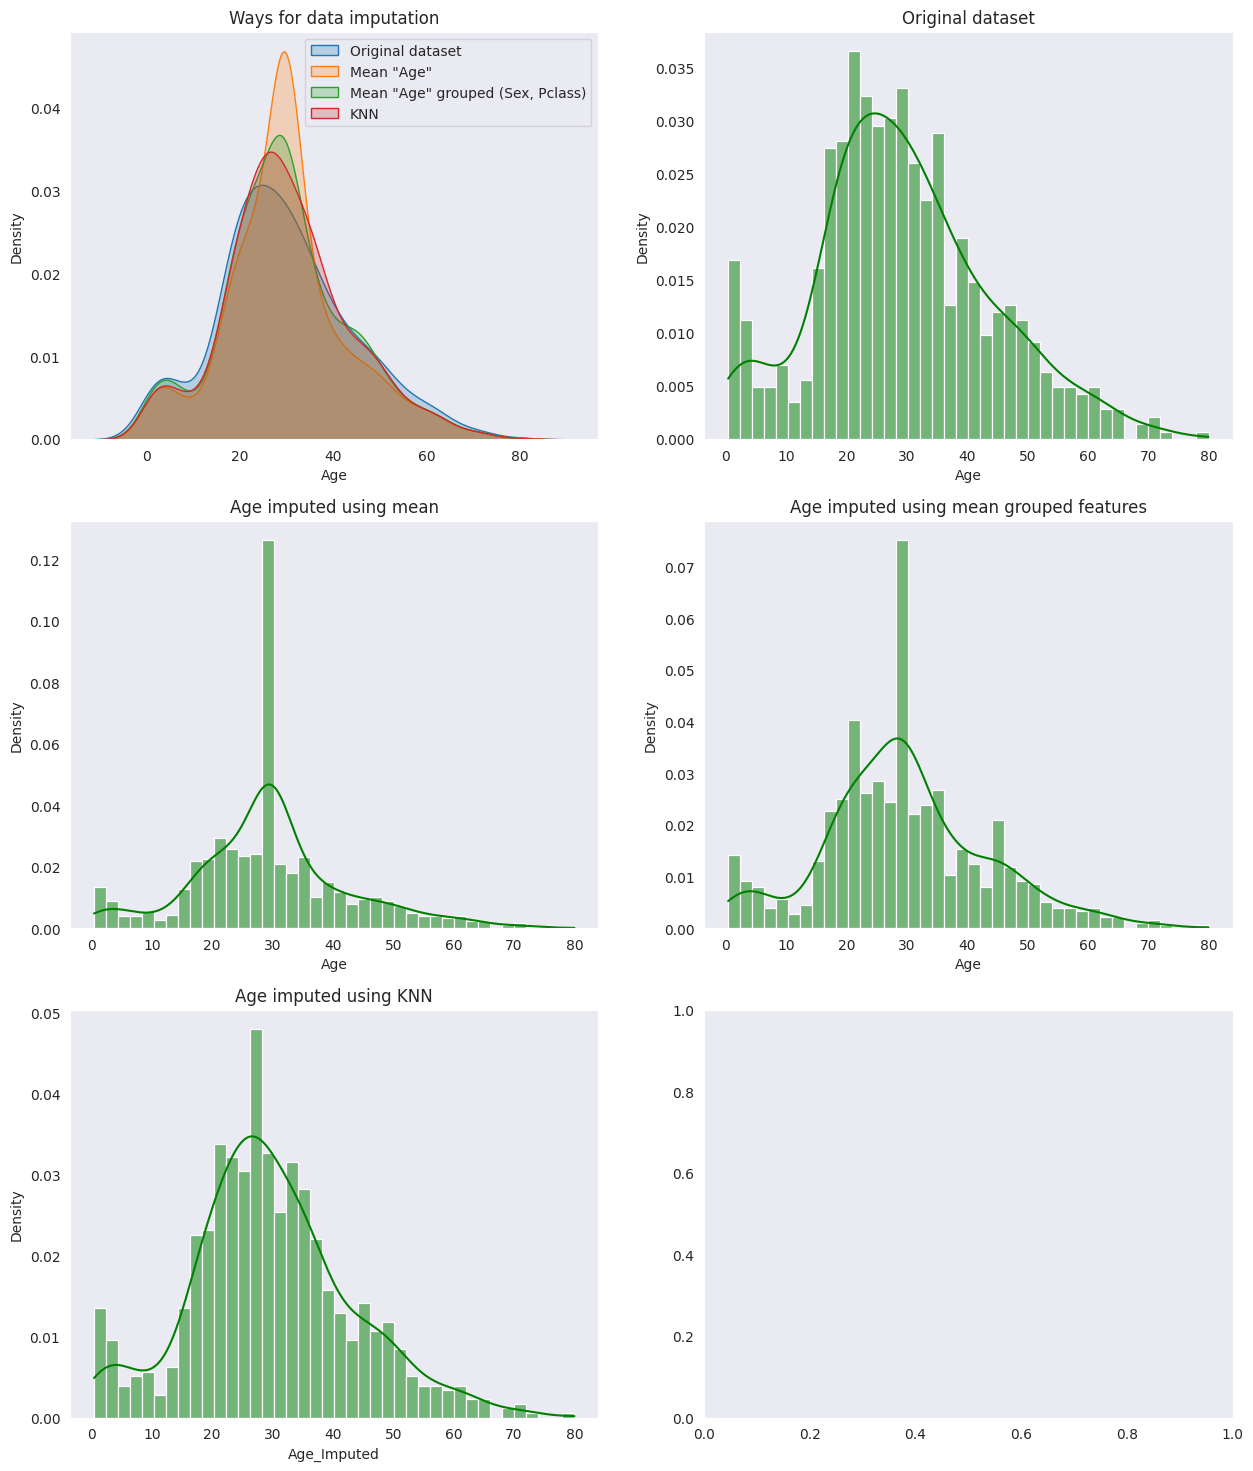

In [496]:
fig, axarr = plt.subplots(3,2,figsize=(15,18))

axarr[0][0].set_title('Ways for data imputation')
g = sns.kdeplot(train_data['Age'], 
                fill=True, ax=axarr[0][0], label='Original dataset')
g = sns.kdeplot(X_transf_general['Age'], 
                fill=True, ax=axarr[0][0], label='Mean "Age"').set_xlabel('Age')
g = sns.kdeplot(X_transformed['Age'], 
                fill=True, ax=axarr[0][0], label='Mean "Age" grouped (Sex, Pclass)')
g = sns.kdeplot(X_transformed_knn['Age_Imputed'], 
                fill=True, ax=axarr[0][0], label='KNN')
g.legend()

axarr[0][1].set_title('Original dataset')
axarr[1][0].set_title('Age imputed using mean')
axarr[1][1].set_title('Age imputed using mean grouped features')
axarr[2][0].set_title('Age imputed using KNN')

f = sns.histplot(train_data['Age'], color='g', bins=40, kde=True, stat='density', ax=axarr[0][1])
f = sns.histplot(X_transf_general['Age'], color='g', bins=40, kde=True, stat='density', ax=axarr[1][0])
f = sns.histplot(X_transformed['Age'], color='g', bins=40, kde=True, stat='density', ax=axarr[1][1])
f = sns.histplot(X_transformed_knn['Age_Imputed'], color='g', bins=40, kde=True, stat='density', ax=axarr[2][0])

## **Numerical representation**

In [497]:
dfs = {'Original' : train_data, 'Mean' : X_transf_general, 'Mean grouped' : X_transformed, 'KNN' : X_transformed_knn}
stats = []
for method in dfs:
    # Central Tendency
    mean_age = dfs[method]['Age'].mean()
    median_age = dfs[method]['Age'].median()
    mode_age = dfs[method]['Age'].mode()

    # Variability
    range_age = dfs[method]['Age'].max() - dfs[method]['Age'].min()
    variance_age = dfs[method]['Age'].var()
    std_dev_age = dfs[method]['Age'].std()
    
    stats.append({'mean_age' : mean_age, 'median_age' : median_age, 'mode_age' : mode_age[0], 'range_age' : range_age, 'variance_age' : variance_age, 'std_dev_age' : std_dev_age})

    
stats_df = pd.DataFrame(stats)
stats_df['method'] = ['Original', 'Mean', 'Mean grouped', 'KNN']
stats_df


,mean_age,median_age,mode_age,range_age,variance_age,std_dev_age,method
0,29.699118,28.000000,24.000000,79.58,211.019125,14.526497,Original
1,29.699118,29.699118,29.699118,79.58,169.052400,13.002015,Mean
2,29.711559,29.184492,29.184492,79.58,185.977360,13.637352,Mean grouped
3,29.699118,28.000000,24.000000,79.58,211.019125,14.526497,KNN


Seeing both KDE plots and numerical statistics, following applies:

**Central tendency**:
- KNN has a median age and mode age that are same as the original dataset, which might indicate that KNN is more effective at maintaining the distribution's shape, especially when considering the mode.

**Variability**:
- There's a noticeable decrease in variance and standard deviation in the mean imputation method compared to the original data, indicating that this method may reduce the overall variability in the dataset.
- The group-based mean and KNN maintain a higher level of variance and standard deviation, closer to the original dataset, suggesting that these methods preserve the data's variability better than the simple mean imputation.

**Conclusion**:
- Althought KNN based imputation may look like good choice to impute the missing 'Age' values in terms of variability it doesn't imply accuracy of the imputed values. This can be verified using:
    - cross-validation or
    - review of the imputed data in the context of other features. For example: Do persons with 'Mrs' title have age considered as adulthood? Do persons with title "Master" have age indicating childhood?  

## **Imputed Age for Title 'Master'**


In [498]:
X_transformed_knn[(X_transformed_knn['Age'].isna()) & (X_transformed_knn['Title'] == 'Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_encoded,Age_Imputed
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master,1,7.934
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master,1,37.000
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master,1,4.200
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master,1,7.934


In [499]:
print(train_data.loc[(train_data['Title'] == 'Master')]['Age'].describe())


count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64


The "Master" ages in the original dataset show the actual age between 0.4-12 years. **Clearly title "Master" in this dataset is assigned with the childhood. One row for PassengerId == 160 was predicted as 37 years.** The difference in predicted age could be due to several factors related to the KNN imputation process:
* **Influence of Nearest Neighbors**: The KNN imputer predicts the missing value based on the nearest neighbors in the feature space. If this particular passenger's nearest neighbors (based on features like 'Pclass', 'SibSp', 'Parch', 'Fare', and 'Title') happened to be significantly older, this would skew the predicted age upwards.
* **Outliers or Unusual Data Patterns**: If this passenger's other features (like ticket fare, class, number of siblings/spouses, or parents/children aboard) are more similar to older passengers, the imputed age could be influenced by these factors. For example, a high fare or a higher class might be more commonly associated with older individuals, influencing the imputation.
* **Data Entry Errors**: There's always a possibility of anomalies or errors in the dataset. If there are errors in the other features for this passenger, it could lead to an inaccurate imputation.

In the case of PassengerId 160 the **notable differences** from other passengers with Title "Master" are:
* 8 siblings/spouses aboard, which is significantly higher than other passengers with the title "Master". This is an unusually high number and might be influencing the imputed age.
* The fare for PassengerId 160 is 69.55, which is on the higher side compared to other passengers with the title "Master". A higher fare might be associated with older passengers in the imputation algorithm.

The combination of a high SibSp value and a relatively high fare could be the reasons why the KNN imputer predicted a much higher age for PassengerId 160 compared to other "Master" passengers.

# Combine the features

## Extract titles from names

In [500]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [501]:
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [502]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [503]:
# Substitute rare female titles
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [504]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

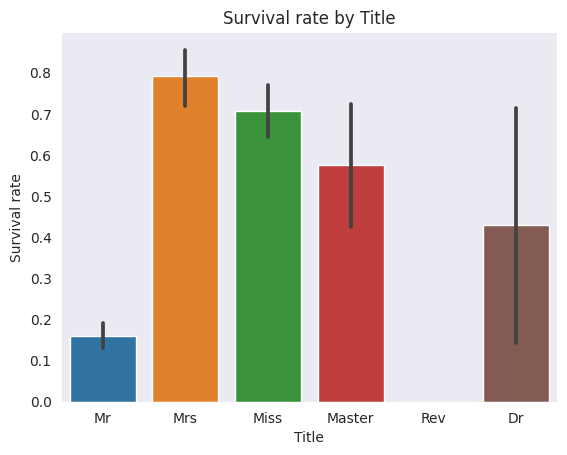

In [505]:
plt.title('Survival rate by Title')
g = sns.barplot(x=train_data.Title, y=train_data.Survived).set_ylabel('Survival rate')

## Extract family size from SibSp and Parch

In [506]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

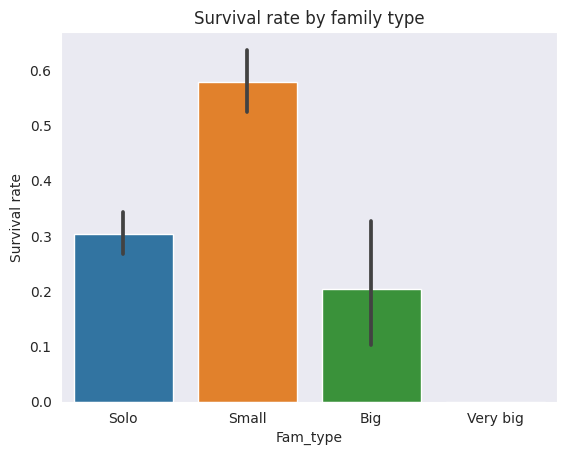

In [507]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')

# Selecting features


In [508]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo


In [509]:
features = ["Survived", "Pclass", "Fare", "Embarked", "Title", "Fam_type", "Age", "Sex"]
X_train = train_data[features]
X_test = test_data[["Pclass", "Fare", "Embarked", "Title", "Fam_type", "Age", "Sex"]]

In [510]:
X_train.head()

,Survived,Pclass,Fare,Embarked,Title,Fam_type,Age,Sex
0,0,3,7.2500,S,Mr,Small,22.0,male
1,1,1,71.2833,C,Mrs,Small,38.0,female
2,1,3,7.9250,S,Miss,Solo,26.0,female
3,1,1,53.1000,S,Mrs,Small,35.0,female
4,0,3,8.0500,S,Mr,Solo,35.0,male


# Data cleaning & combining

In [511]:
y = titanic_train["Survived"]
X = titanic_train.drop('Survived', axis=1)
data_num = X[["PassengerId", "Pclass", "SibSp", "Parch", "Age"]]
data_num.head()

,PassengerId,Pclass,SibSp,Parch,Age
0,1,3,1,0,22.0
1,2,1,1,0,38.0
2,3,3,0,0,26.0
3,4,1,1,0,35.0
4,5,3,0,0,35.0


In [512]:
data_num.dtypes

PassengerId      int64
Pclass           int64
SibSp            int64
Parch            int64
Age            float64
dtype: object

In [513]:
data_cat = X[["Name", "Sex", "Ticket", "Embarked", "Fare"]]

data_cat.head()

,Name,Sex,Ticket,Embarked,Fare
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,71.2833
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,53.1000
4,"Allen, Mr. William Henry",male,373450,S,8.0500


## Numerical pipeline

In [514]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


class CombinedAttributesAdderNumerical(BaseEstimator, TransformerMixin):
    def __init__(self, newAttributes=True):
        self.newAttributes = newAttributes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.newAttributes:
            X["fam_size"] = X['SibSp'] + X['Parch'] + 1
            X = X.drop("SibSp", axis=1)
            X = X.drop("Parch", axis=1)        
        return X
    
class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.age_means = X_transformed.groupby(['Pclass', 'SibSp', 'Parch', 'Title'])['Age'].transform('mean')
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Age'] = X_transformed['Age'].fillna(self.age_means)
        return X_transformed

In [515]:
num_pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('combine_attr', CombinedAttributesAdderNumerical()),
    ('imputer', SimpleImputer(strategy="median")),
    ('normalizer', Normalizer()),
    ('std_scaler', StandardScaler()),
])

## Categorical pipeline

In [516]:
class CategoryExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, newAttributes=True):
        self.newAttributes = newAttributes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed['Title'] = X_transformed['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        X_transformed['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
        X_transformed['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
        X_transformed = X_transformed.drop("Name", axis=1)
        return X_transformed
    
class AttributesBinner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        fare_bins = [0, 25, 50, 100, 500]
        X_transformed['FareCategory'] = pd.cut(X_transformed['Fare'], bins=fare_bins)
        X_transformed = X_transformed.drop("Fare", axis=1)
        return X_transformed

In [517]:
cat_pipeline = Pipeline([
    ('cat_extractor', CategoryExtractor()),
    ('binner', AttributesBinner()),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot_encoder', OneHotEncoder())
])

#df_cat = cat_pipeline.fit_transform(data_cat)
#print(df_cat)

# Pipelines execution

In [518]:
data_num_cols = X[["Pclass", "SibSp", "Parch", "Age"]].columns
data_cat_cols = X[["Name", "Sex", "Embarked", "Fare"]].columns


full_pipeline = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, data_cat_cols),
    ('num_pipeline', num_pipeline, data_num_cols)
])

X_prepared = full_pipeline.fit_transform(X)
print(X_prepared)

[[ 0.          1.          0.         ...  0.22663087  0.21613034
  -0.09523736]
 [ 1.          0.          1.         ... -0.77898023  0.30006583
  -0.31040471]
 [ 1.          0.          0.         ...  0.04066041  0.25905635
  -0.39353045]
 ...
 [ 1.          0.          0.         ... -0.08211733  0.20735814
   0.16743625]
 [ 0.          1.          1.         ... -0.66630498  0.30190624
  -0.3922304 ]
 [ 0.          1.          0.         ... -0.15661165  0.27716714
  -0.43452257]]


# Models

## Linear regression

In [519]:
from sklearn.linear_model import LinearRegression

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [3.97603469e-01 3.92175644e-01 4.05699503e-01 3.60413631e-01
 3.96033408e-01 3.72634619e-01 4.07772048e-01 4.04502970e-01
 4.86288515e+11 3.56693883e-01]
Mean: 48628851513.74244
Standard deviation: 145886554540.0628


## Logistic regression

In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

degree = 3

log_reg = make_pipeline(
    PolynomialFeatures(degree), 
    LogisticRegression(max_iter=2000))

#log_reg = LogisticRegression(max_iter=2000)

scores = cross_val_score(log_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-scores)

display_scores(log_rmse_scores)

Scores: [0.49441323 0.47404546 0.50835712 0.33520076 0.47404546 0.44971901
 0.46204236 0.50835712 0.44971901 0.42399915]
Mean: 0.45798987125749113
Standard deviation: 0.048271852131376476


## Decision tree

In [521]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
#tree_reg.fit(X_prepared, y)

scores = cross_val_score(tree_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [0.55892408 0.40349742 0.53442868 0.43688971 0.47163151 0.41850202
 0.46859506 0.47428808 0.44661829 0.49383114]
Mean: 0.4707205982278195
Standard deviation: 0.04621896858886278


## Random forest

In [522]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30, 60], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_prepared, y)
grid_search.best_params_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4475669078812879 {'max_features': 2, 'n_estimators': 3}
0.420647832244077 {'max_features': 2, 'n_estimators': 10}
0.41519756664023943 {'max_features': 2, 'n_estimators': 30}
0.4094039684103921 {'max_features': 2, 'n_estimators': 60}
0.454504614728192 {'max_features': 4, 'n_estimators': 3}
0.4131251262201716 {'max_features': 4, 'n_estimators': 10}
0.4104923211446059 {'max_features': 4, 'n_estimators': 30}
0.4100840871947207 {'max_features': 4, 'n_estimators': 60}
0.4472296007541211 {'max_features': 6, 'n_estimators': 3}
0.42392268717198545 {'max_features': 6, 'n_estimators': 10}
0.41082223989577105 {'max_features': 6, 'n_estimators': 30}
0.4096770096560088 {'max_features': 6, 'n_estimators': 60}
0.44409049235307974 {'max_features': 8, 'n_estimators': 3}
0.4173236133882187 {'max_features': 8, 'n_estimators': 10}
0.41098730768324754 {'max_features': 8, 'n_estimators': 30}
0.40843585637271734 {'max_features': 8, 'n_estimators': 60}
0.4540675357092118 {'bootstrap': False, 'max_features': 

# Final model

In [523]:
X_test = titanic_test.copy()
X_test_prepared = full_pipeline.transform(X_test)

# Uncomment to use RandomForestRegressor
#final_model = grid_search.best_estimator_
#predictions = final_model.predict(X_test_prepared)


log_reg.fit(X_prepared, y)
predictions = log_reg.predict(X_test_prepared)



# Save results

In [524]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
